<h1> Introduction to Matplotlib </h1>


<h2> Artist Layer </h2>

In [1]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import numpy as np

fig = Figure()
canvas = FigureCanvas(fig)

# create 10000 ransom numbers using numpy
x = np.random.randn(10000)


# create an axes Artist
ax = fig.add_subplot(111)
ax.hist(x,100)

# save
ax.set_title('Histogram')
fig.savefig('matplotlib.png')

<h2>Scripting Layer</h2>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# create 10000 ransom numbers using numpy
x = np.random.randn(10000)

# create an axes Artist
plt.hist(x,100)
plt.title('Histogram')
plt.savefig('matplotlib.png')
plt.show()


<Figure size 640x480 with 1 Axes>

<h2>Plot Function</h2>

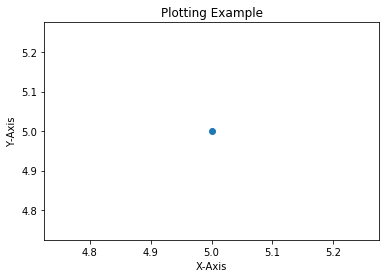

In [3]:
%matplotlib inline

plt.plot(5,5,'o')
plt.title('Plotting Example')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.show()

<IPython.core.display.Javascript object>


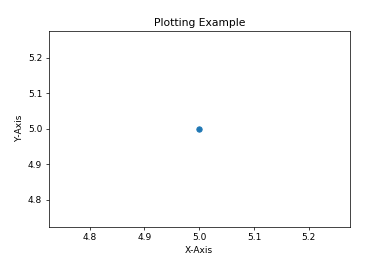

In [5]:
%matplotlib notebook

plt.plot(5,5,'o')

In [6]:
# add title and lables after figure is created

plt.title('Plotting Example')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
# plt.show() # no need 

Text(24.32499897480011, 0.5, 'Y-Axis')

<h2>Pandas Inbuilt plotting function</h2>

In [7]:
%matplotlib inline

import pandas as pd

df = pd.DataFrame({'india':[1880, 8670, 8147, 7338, 5704],'china':[5123, 6682, 3308, 1863, 1527]},index=[1980,1981,1982,1983,1984])
df

,india,china
1980,1880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


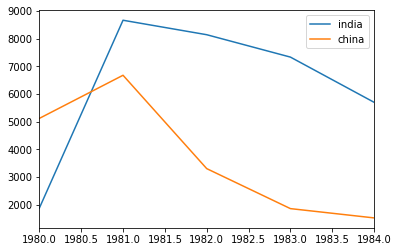

In [8]:
df.plot(kind='line')

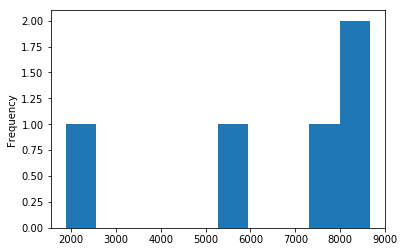

In [9]:
df['india'].plot(kind='hist')

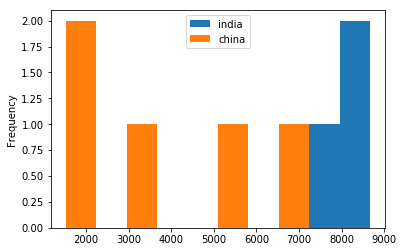

In [10]:
df.plot(kind='hist')

<h2> Read Data Into Panads DataFrame</h2>

In [12]:
import numpy as np
import pandas as pd

df = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


<h2>Line Plots</h2>

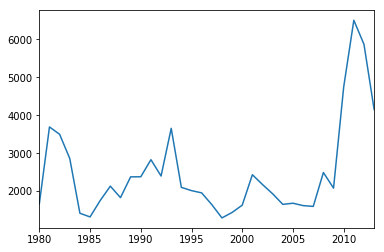

In [13]:
df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

df['Total'] = df.sum(axis=1)

years = list(map(str, range(1980, 2014)))
df[['Country', 1980, 1981, 1982, 1983, 1984, 1985]]

df.set_index('Country', inplace=True)
df.index.name = None


df.columns = list(map(str, df.columns))
years = list(map(str, range(1980, 2014)))

haiti = df.loc['Haiti', years]
haiti.plot()

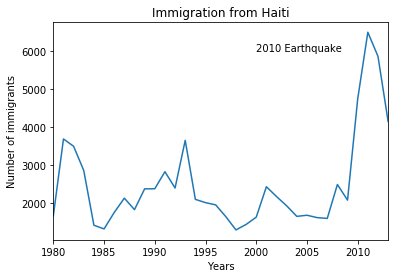

In [14]:
haiti.index = haiti.index.map(int)
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake')

plt.show()

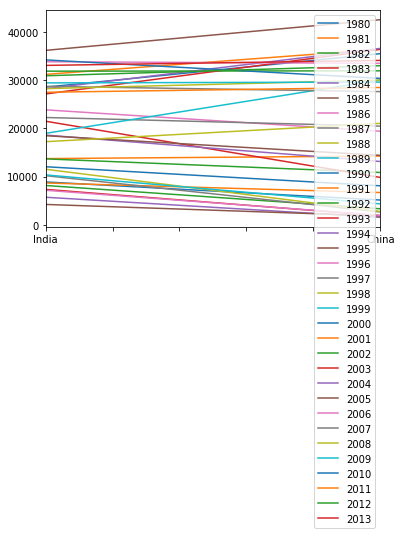

In [15]:
df_CI = df.loc[['India', 'China'], years]
df_CI.plot(kind='line')
plt.show() 

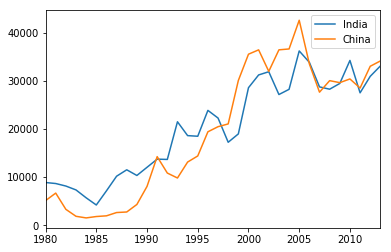

In [16]:
df_CI = df_CI.transpose()
df_CI.plot(kind='line')
plt.show()

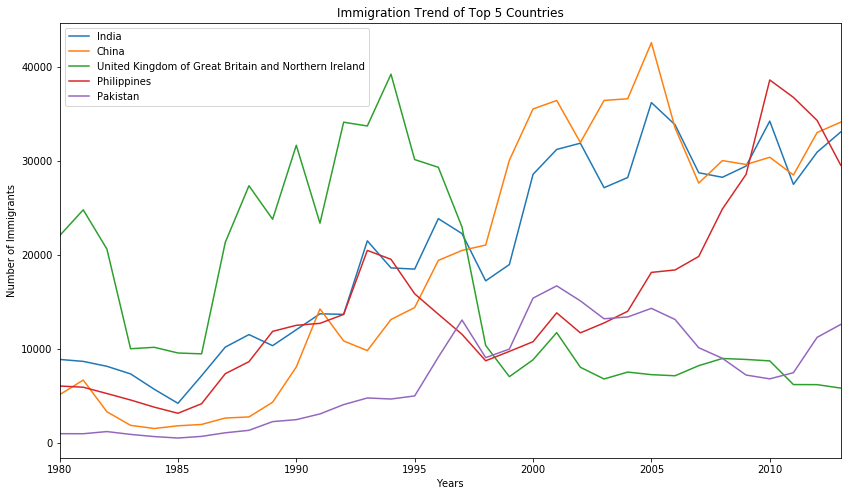

In [17]:
df.sort_values(by='Total', ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df.head(5)

# transpose the dataframe
df_top5 = df_top5[years].transpose() 

df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='line', figsize=(14, 8))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()
